# Active Use per Day of the FCC Gitter Help room (Jan-Jul 2015)

We analysed (quick and dirty) the counts of all messages in the room per day time (GMT).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This file include:
* Data preparation to extract the time variable
* Plotting

In [2]:
import os, sys
from datetime import datetime
import pickle
import matplotlib.pyplot as plt

### Data Preparation

In [3]:
directory = "/your/path/to/data"
raw = pickle.load(open(directory+"help.pkl", "rb"))
d = {}
for elem in raw:
    #print(elem)
    if elem['sent'][:10] not in list(d.keys()):
        d[elem['sent'][:10]] = {}
    if elem['sent'][11:13] not in list(d[elem['sent'][:10]].keys()):
        d[elem['sent'][:10]][elem['sent'][11:13]] = 0
    d[elem['sent'][:10]][elem['sent'][11:13]] += 1

### Plotting 

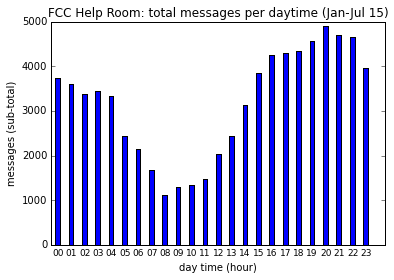

In [4]:
y_t = [0]*24
x_t = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

for datum in d:
    #print(datum)
    for ind, tijd in enumerate(x_t):
        if tijd in list(d[datum].keys()):
            y_t[ind] += d[datum][tijd]

width = .35
plt.bar([x+.35 for x in range(24)], y_t, width)
plt.ylabel('messages (sub-total)')
plt.xlabel('day time (hour)')
plt.xticks([x+.55 for x in range(24)], x_t, fontsize = 9)
plt.tick_params(
axis='x',          # changes apply to the x-axis
which='both',      # both major and minor ticks are affected
bottom='off',      # ticks along the bottom edge are off
top='off',         # ticks along the top edge are off
labelbottom='on')
plt.title('FCC Help Room: total messages per daytime (Jan-Jul 15)')
plt.show()

The results suggest that there is a time of the day where the activity is higher, with a peak at 20:00 GMT. This is also a suggestion of the broad geographical origin of the members of the group, although it is not conclusive.